In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def fit(self, X, y):
        """
        Train the linear regression model using gradient descent
        
        Parameters:
        X: training features (numpy array)
        y: target values (numpy array)
        """
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Make predictions
            y_predicted = self._predict(X)
            
            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate cost function (MSE)
            cost = (1/(2*n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)
            
            # Optional: Print cost every 100 iterations
            if (i+1) % 100 == 0:
                print(f'Iteration {i+1}/{self.n_iterations}: Cost = {cost:.4f}')
    
    def _predict(self, X):
        """Make predictions using the current weights and bias"""
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        """Make predictions on new data"""
        return self._predict(X)
    
    def score(self, X, y):
        """Calculate the coefficient of determination (R^2)"""
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)
    
    def plot_cost_history(self):
        """Plot the cost function over iterations"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.n_iterations + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Over Iterations')
        plt.grid(True)
        plt.show()


Iteration 100/1000: Cost = 0.9026
Iteration 200/1000: Cost = 0.4853
Iteration 300/1000: Cost = 0.4574
Iteration 400/1000: Cost = 0.4418
Iteration 500/1000: Cost = 0.4307
Iteration 600/1000: Cost = 0.4228
Iteration 700/1000: Cost = 0.4172
Iteration 800/1000: Cost = 0.4132
Iteration 900/1000: Cost = 0.4103
Iteration 1000/1000: Cost = 0.4083

Final Parameters:
Weights: [2.93070525]
Bias: 4.033214213676792
R^2 Score: 0.7664


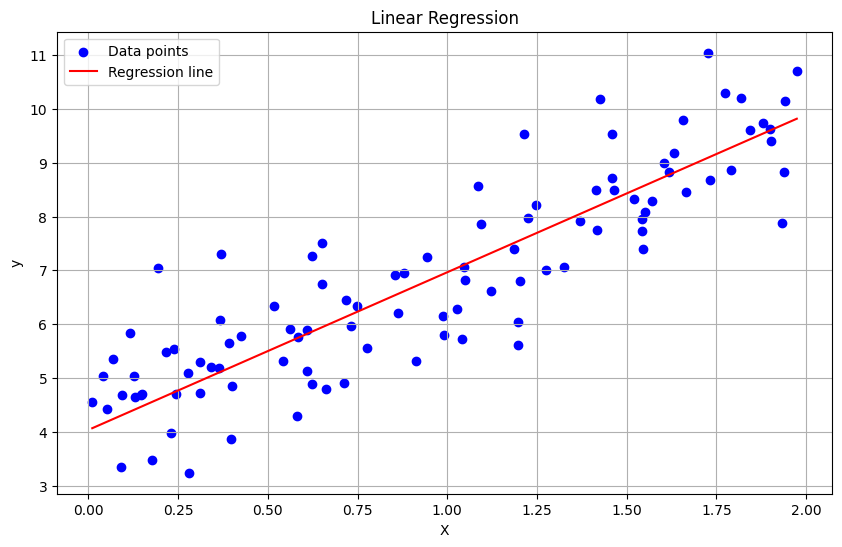

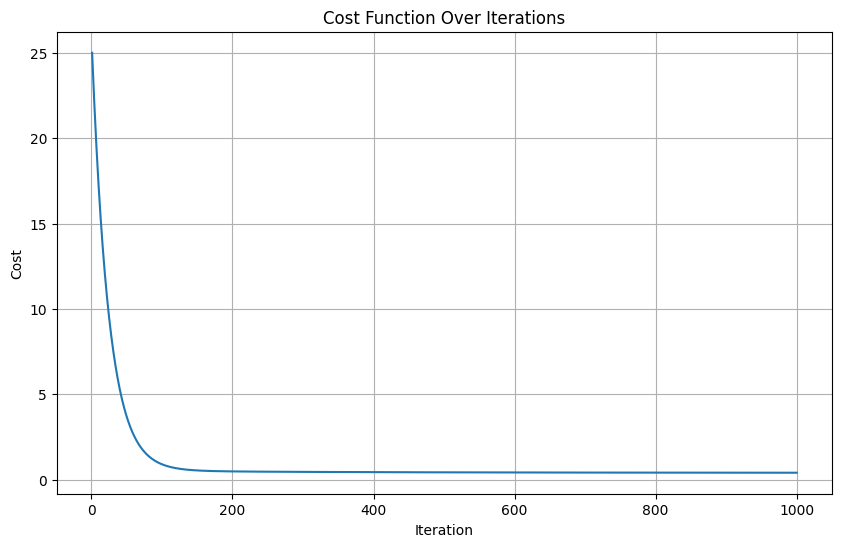

In [4]:
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    
    # Reshape y to be a 1D array if needed
    if y.ndim > 1:
        y = y.flatten()
    
    # Create and train the model
    lr = LinearRegression(learning_rate=0.01, n_iterations=1000)
    lr.fit(X, y)
    
    # Print results
    print(f"\nFinal Parameters:")
    print(f"Weights: {lr.weights}")
    print(f"Bias: {lr.bias}")
    print(f"R^2 Score: {lr.score(X, y):.4f}")
    
    # Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    
    # Sort X for line plotting
    X_plot = np.sort(X, axis=0)
    y_plot = lr.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', label='Regression line')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot cost history
    lr.plot_cost_history()